In [1]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(25,10)})

In [2]:
df = pd.read_csv("../data/fraudAll.csv")

**Data Description**
* **index** - Unique Identifier for each row
* **transdatetrans_time** - Transaction DateTime
* **cc_num** - Credit Card Number of Customer
* **merchant** - Merchant Name
* **category** - Category of Merchant
* **amt** - Amount of Transaction
* **first** - First Name of Credit Card Holder
* **last** - Last Name of Credit Card Holder
* **gender** - Gender of Credit Card Holder
* **street** - Street Address of Credit Card Holder
* **city** - City of Credit Card Holder
* **state** - State of Credit Card Holder
* **zip** - Zip of Credit Card Holder
* **lat** - Latitude Location of Credit Card Holder
* **long** - Longitude Location of Credit Card Holder
* **city_pop** - Credit Card Holder's City Population
* **job** - Job of Credit Card Holder
* **dob** - Date of Birth of Credit Card Holder
* **trans_num** - Transaction Number
* **unix_time** - UNIX Time of transaction
* **merch_lat** - Latitude Location of Merchant
* **merch_long** - Longitude Location of Merchant
* **is_fraud** - Fraud Flag <--- Target Class


In [3]:
df.shape

(1296675, 23)

In [4]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [5]:
df = df.rename(columns={'Unnamed: 0': 'index'})
df.head(3)

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   index                  1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [10]:
#check if there is any missing values
df.isnull().sum()

index                    0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
df.iloc[0,1]

'2019-01-01 00:00:18'

In [12]:
type(df.iloc[0,1])

str

In [13]:
# function to convert object to date
def transform_col_todate(df,col_names):
    for col in col_names:
        #convert trans_date_trans_time , dob to datetime
        df[col] = pd.to_datetime(df[col])
    return df

In [14]:
col_todate=["trans_date_trans_time","dob"]
df =  transform_col_todate(df,col_todate)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   index                  1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [16]:
#create new columns day,month,year
df["year"]=df["trans_date_trans_time"].dt.year
df["month"]=df["trans_date_trans_time"].dt.month
df["day"]=df["trans_date_trans_time"].dt.day

In [17]:
#Extract month_name,day_name
df["month_name"]=df["trans_date_trans_time"].dt.month_name()
df["day_name"]=df["trans_date_trans_time"].dt.day_name()

In [18]:
#Extract hour,minute and second
df["hour"]=df["trans_date_trans_time"].dt.hour
df["minute"]=df["trans_date_trans_time"].dt.minute
df["sec"]=df["trans_date_trans_time"].dt.second

In [19]:
df.head(3)

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year,month,day,month_name,day_name,hour,minute,sec
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019,1,1,January,Tuesday,0,0,18
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019,1,1,January,Tuesday,0,0,44
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019,1,1,January,Tuesday,0,0,51


**Let's start to examine how different features relate to the target column (fraud)**

## 1. Relation between transaction amount and fraud :

In [20]:
#let's check the distribution of the amount transaction col
df.amt.describe().round()

count    1296675.0
mean          70.0
std          160.0
min            1.0
25%           10.0
50%           48.0
75%           83.0
max        28949.0
Name: amt, dtype: float64

In [23]:
#99 percentile
np.percentile(df.amt , 99)

545.9926000000002

In [29]:
df.loc[df.amt >= np.percentile(df.amt , 99), 'is_fraud'].mean()

0.2776278244775199

**The 99 percentile here is around 546$**

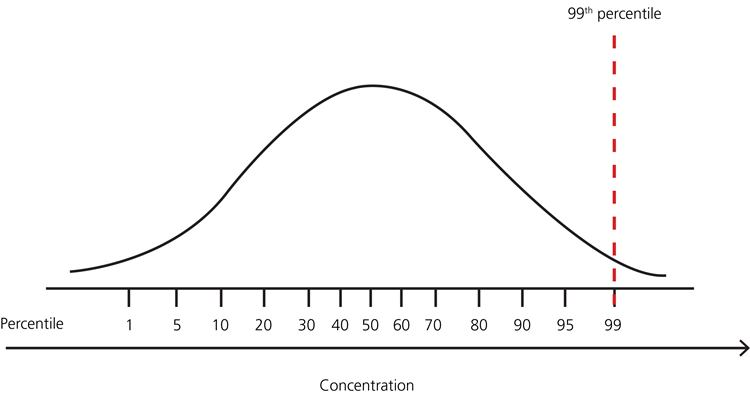

In [27]:
from IPython.display import Image
Image(filename="images/FIG 6 Example.jpg")

/opt/anaconda3/envs/mlops/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Transaction Amount in USD')

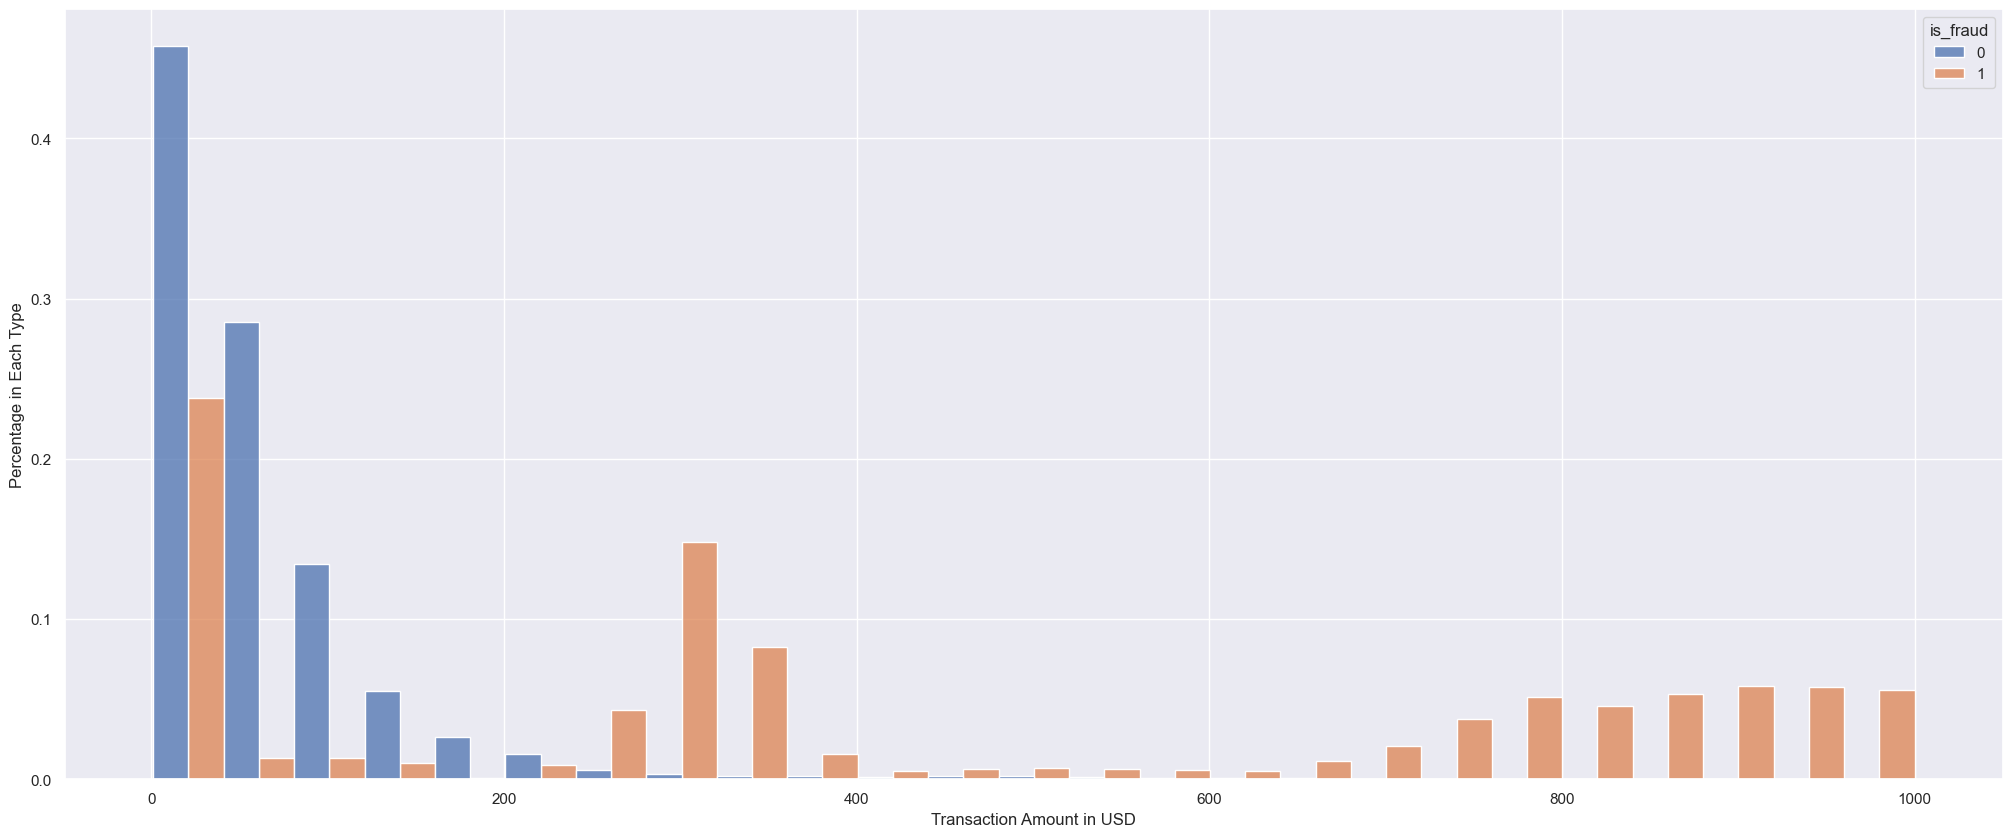

In [31]:
#we substracted the data with amount transaction less than 1000 to get more readable graph
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='probability',bins=25,multiple='dodge',
                common_norm=False)
ax.set_ylabel("Percentage in Each Type")
ax.set_xlabel("Transaction Amount in USD")

**The result is very interesting! While normal transactions tend to be around 200 USD or less, we see fraudulent transactions peak around 300 USD and then at the 800 USD -1000 USD range. There is a very clear pattern here!**

## 2. Relation between Gender and fraud :

/opt/anaconda3/envs/mlops/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Credit Card Holder Gender')

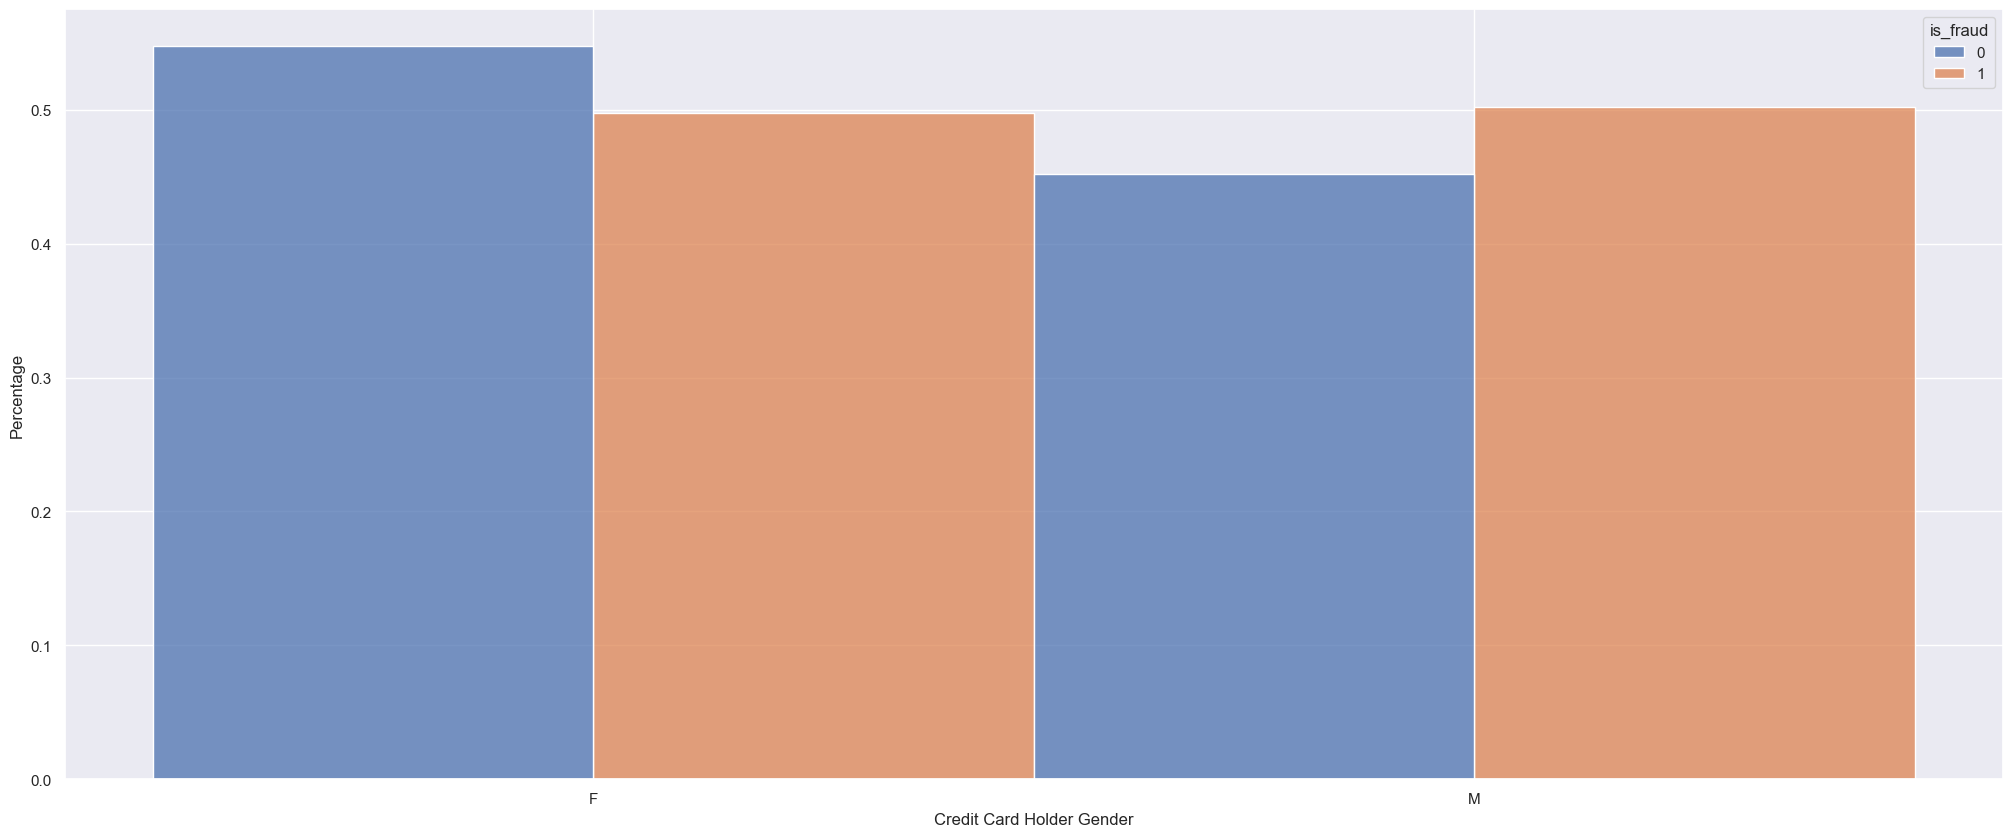

In [32]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='probability',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')

**In this case, we do not see a clear difference between both genders. Data seem to suggest that females and males are almost equally susceptible (50%) to transaction fraud. Gender is not very indicative of a fraudulent transaction.**

## 3. Relation between Spending category and fraud :

Now, we will examine in which spending categories fraud happens most predominantly. To do this, we first calculate the distribution in normal transactions and then the the distribution in fraudulent activities. The difference between the 2 distributions will demonstrate which category is most susceptible to fraud.

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

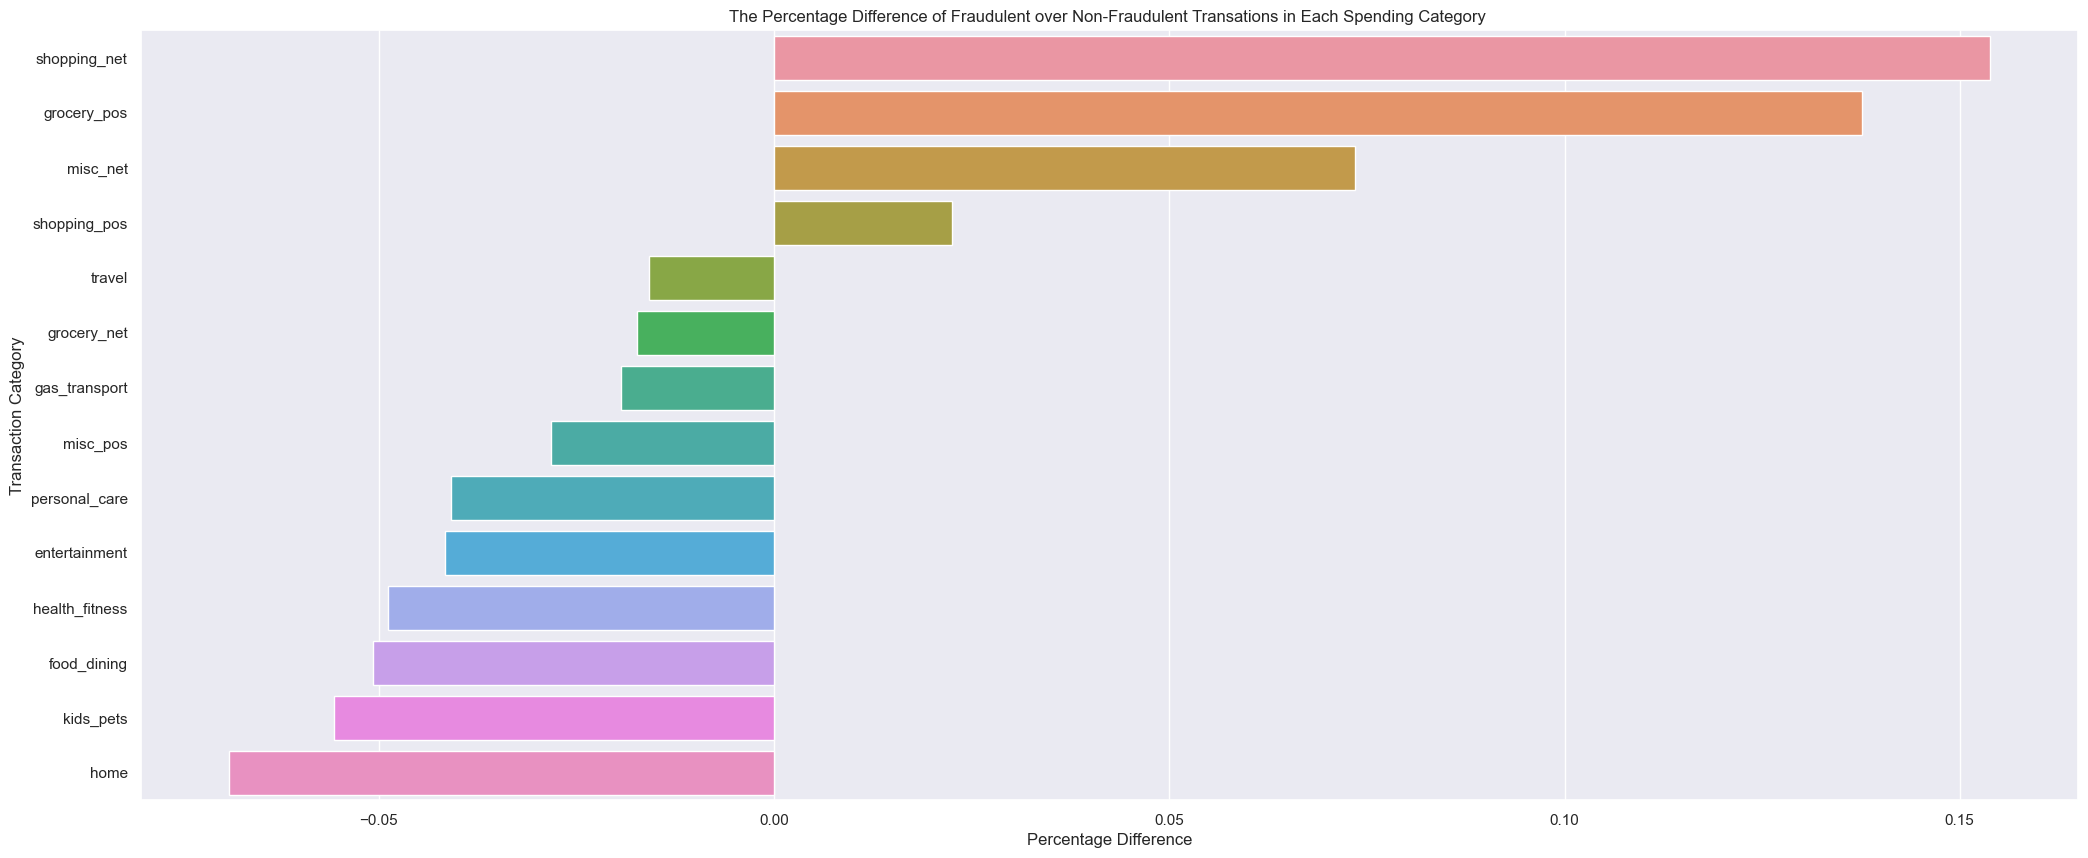

In [33]:
#calculate the percentage difference
a=df[df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=df[df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

In [35]:
ab

,category,not fraud percentage,fraud percentage,diff
0,gas_transport,0.101648,0.082334,-0.019314
1,home,0.095346,0.026379,-0.068967
2,grocery_pos,0.094553,0.232214,0.137661
3,shopping_pos,0.089848,0.112310,0.022462
4,kids_pets,0.087495,0.031841,-0.055654
5,shopping_net,0.074335,0.228217,0.153883
6,entertainment,0.072745,0.031042,-0.041703
7,food_dining,0.070829,0.020117,-0.050711
8,personal_care,0.070230,0.029310,-0.040920
9,health_fitness,0.066513,0.017719,-0.048793


**Some spending categories indeed see more fraud than others! Fraud tends to happen more often in Shopping_net', 'Grocery_pos'and 'misc_net' while 'home' and 'kids_pets' among others tend to see more normal transactions than fraudulent ones.**

## 4. Relation between age and fraud :

/opt/anaconda3/envs/mlops/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


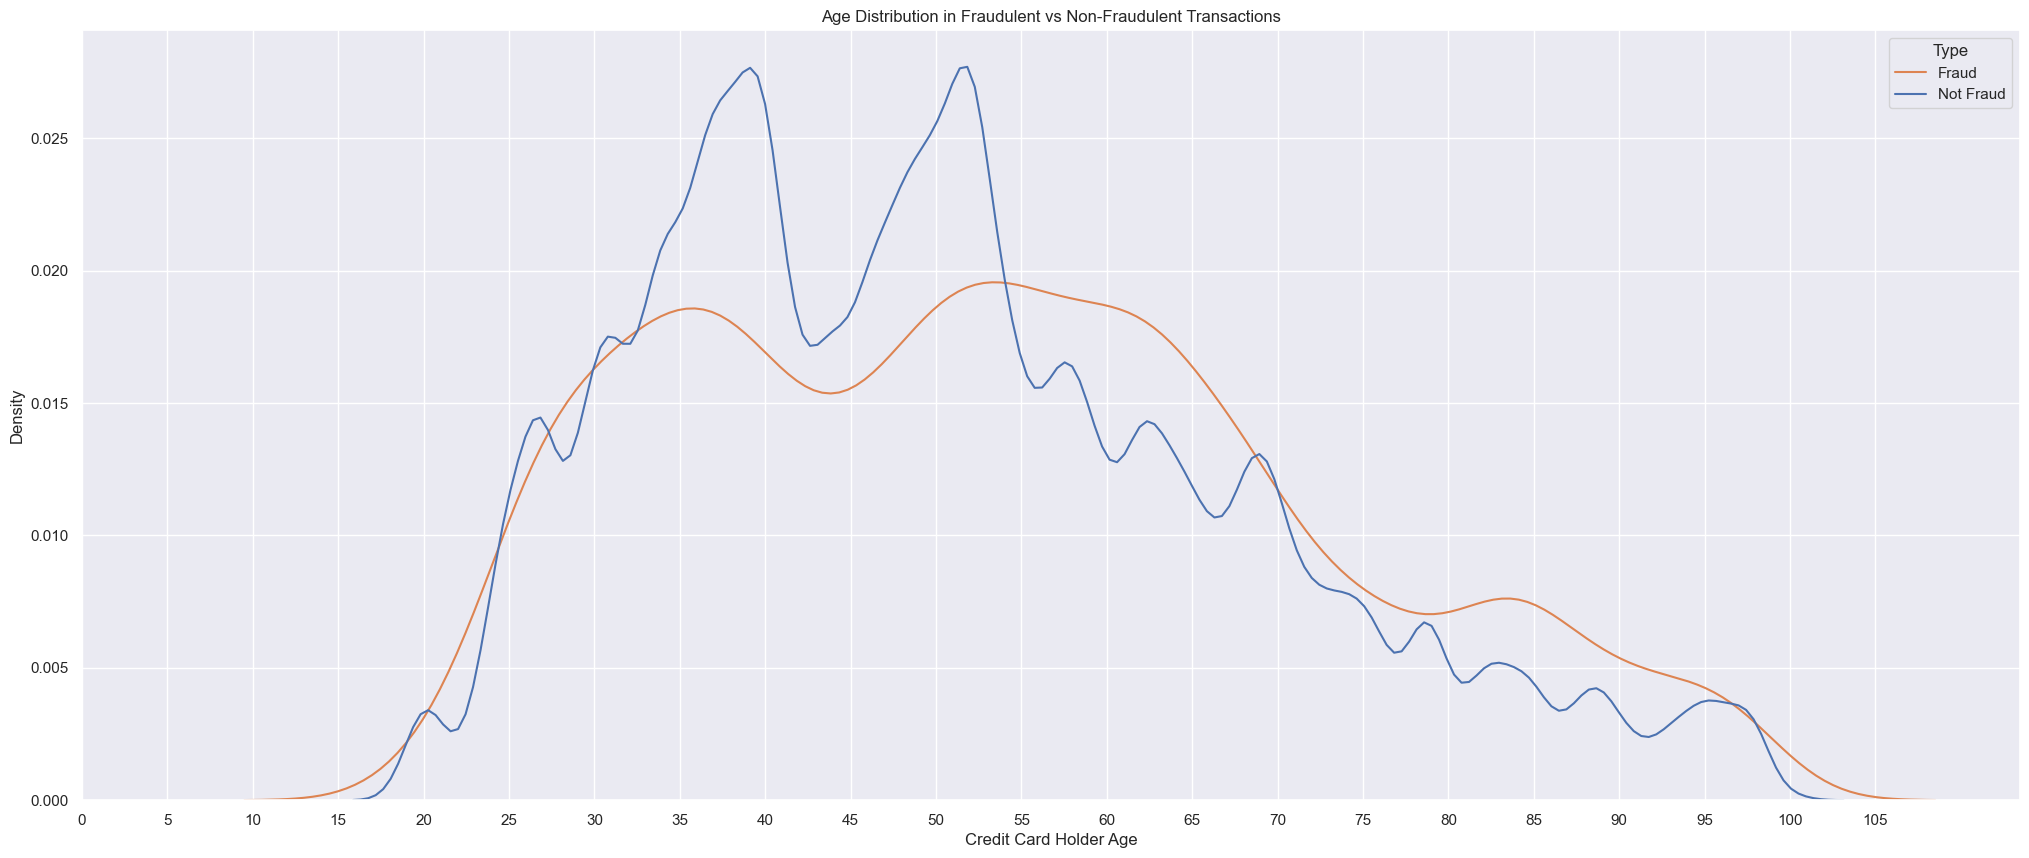

In [36]:
#age vs fraud
import datetime as dt
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

 **In normal transactions, there are 2 peaks at the age of 37-38 and 49-50, while in fraudulent transactions, the age distribution is a little smoother and the second peak does include a wider age group from 50-65. This does suggest that older people are potentially more prone to fraud.**

## 5. Cyclicity of Credit Card Fraud:

How do fraudulent transactions distribute on the temporal spectrum? Is there an hourly, monthly, or seasonal trend? We can use the transaction time column to answer this question.

### Hourly trend :

/opt/anaconda3/envs/mlops/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


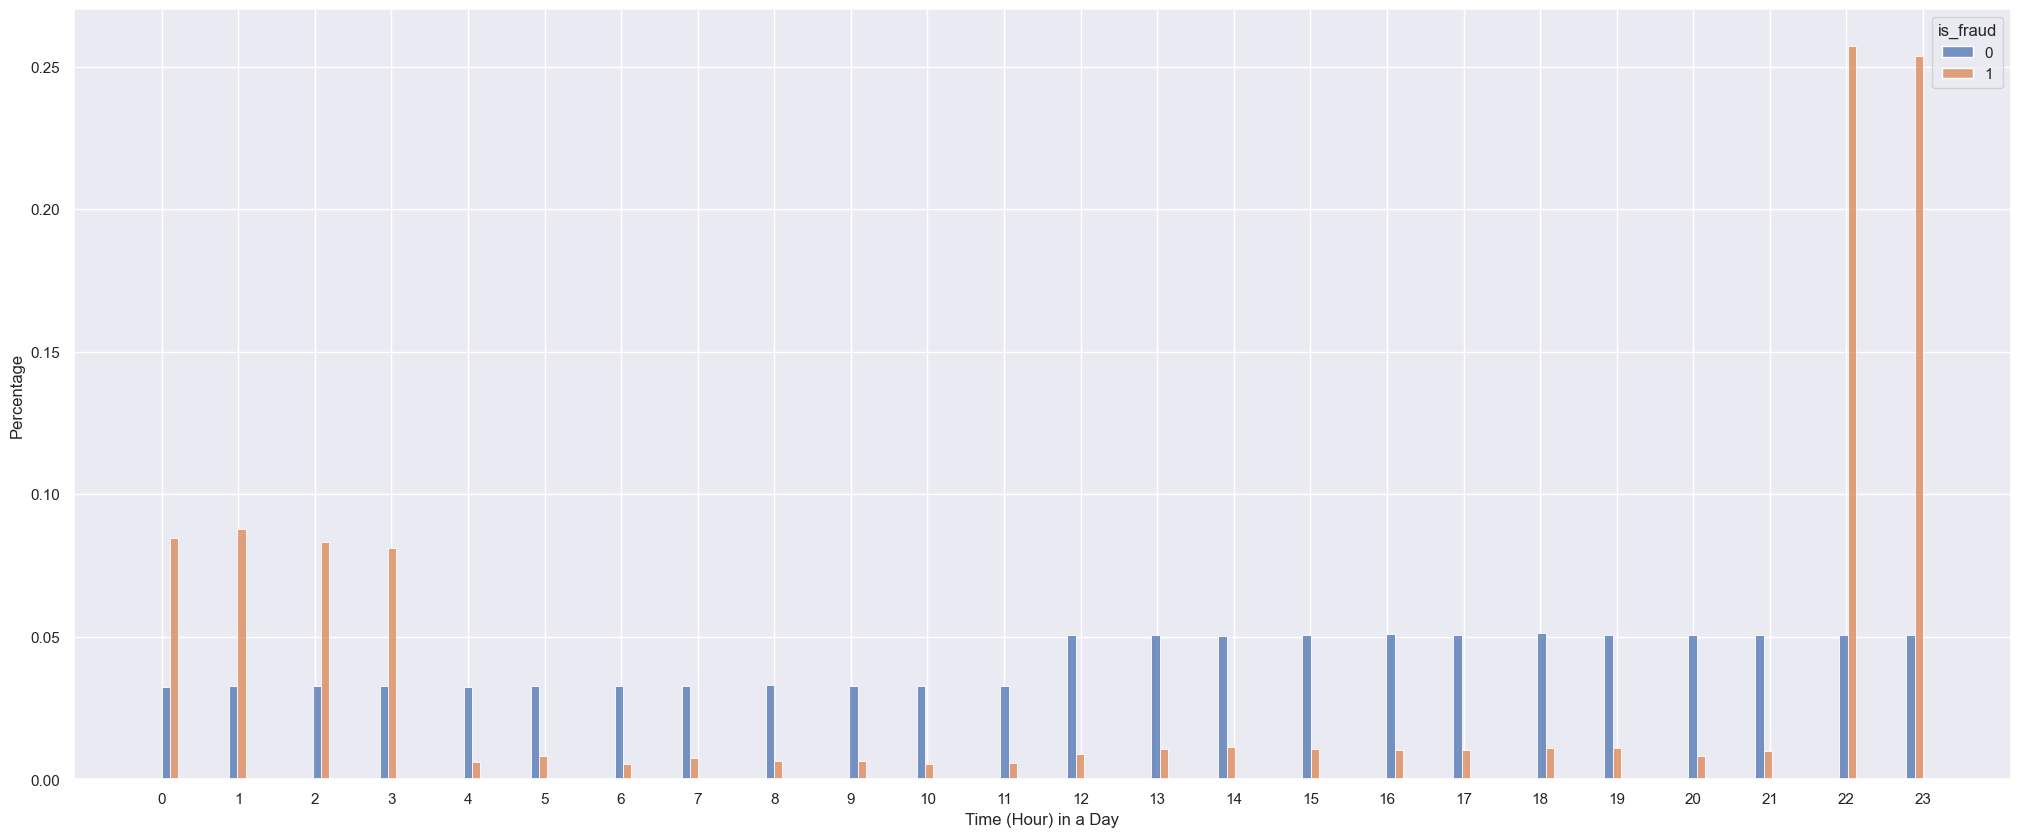

In [37]:
ax=sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False,stat='probability',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.show()

**There is a clear pattern ! While normal transactions distribute more or less equally throughout the day, fraudulent payments happen disproportionately around midnight when most people are asleep!**

### Weekly trend :

/opt/anaconda3/envs/mlops/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'day name')

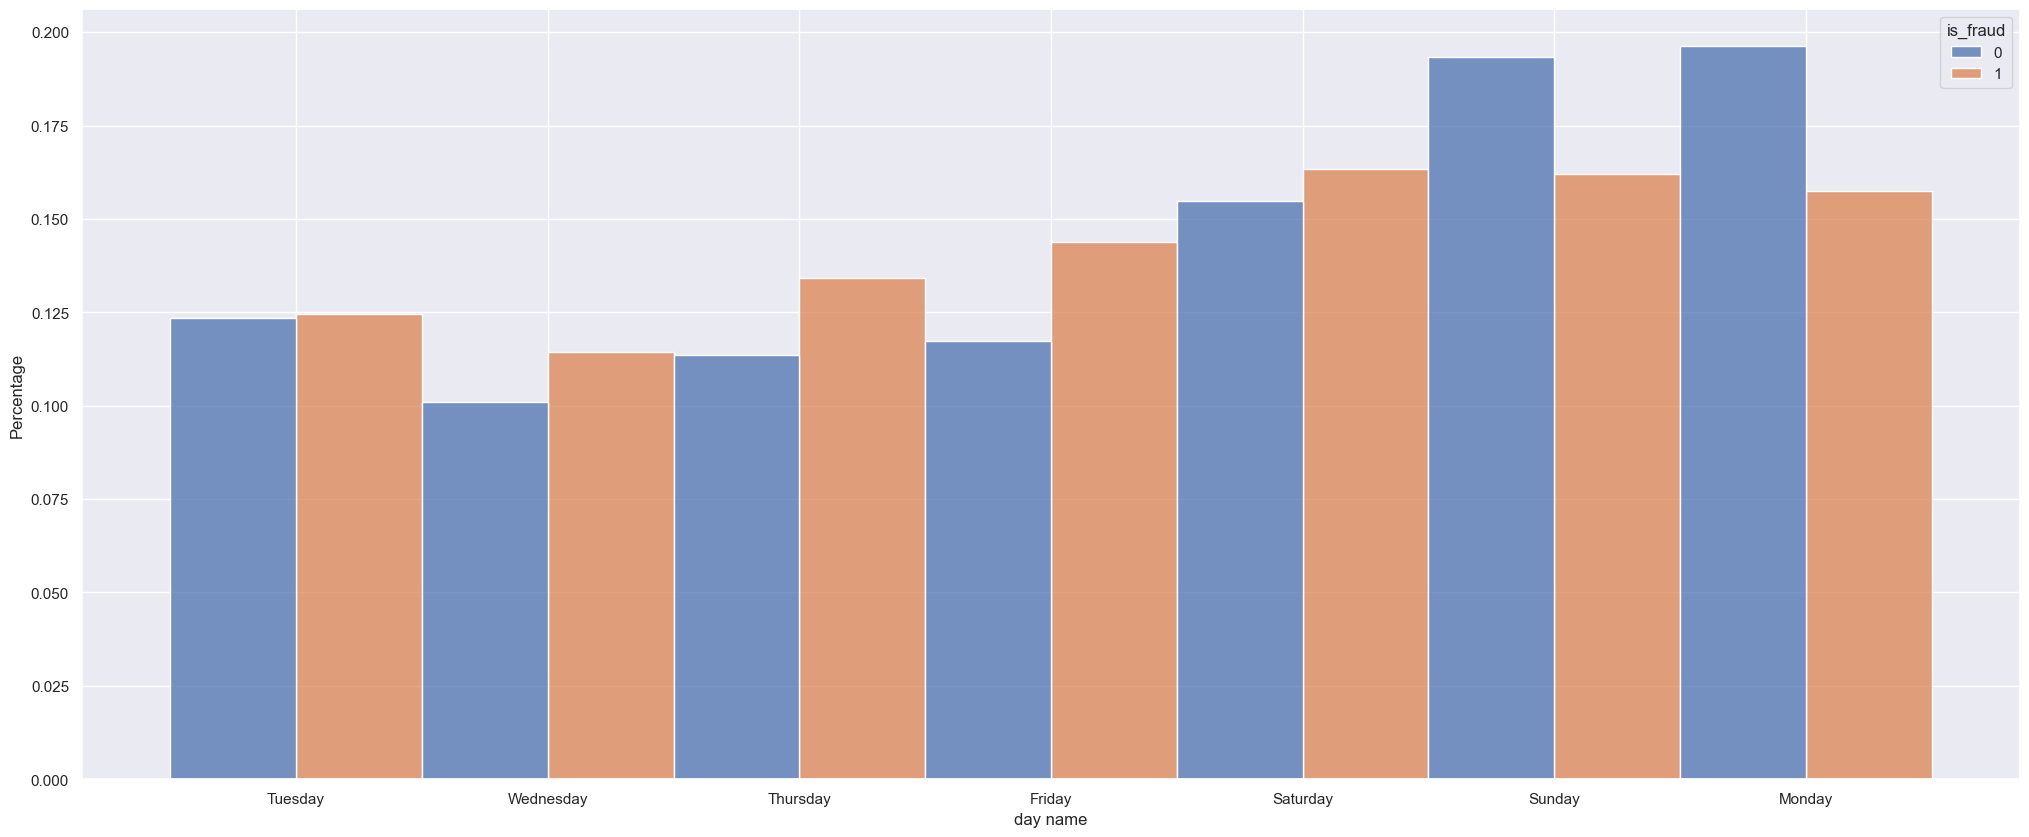

In [38]:
ax=sns.histplot(data=df, x="day_name", hue="is_fraud", common_norm=False,stat='probability',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('day name')

**Normal transactions tend to happen more often on Monday and Sunday while fraudulent ones tend to spread out more evenly throughout the week.**

### Monthly trend :

In [39]:
df.month_name.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

/opt/anaconda3/envs/mlops/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


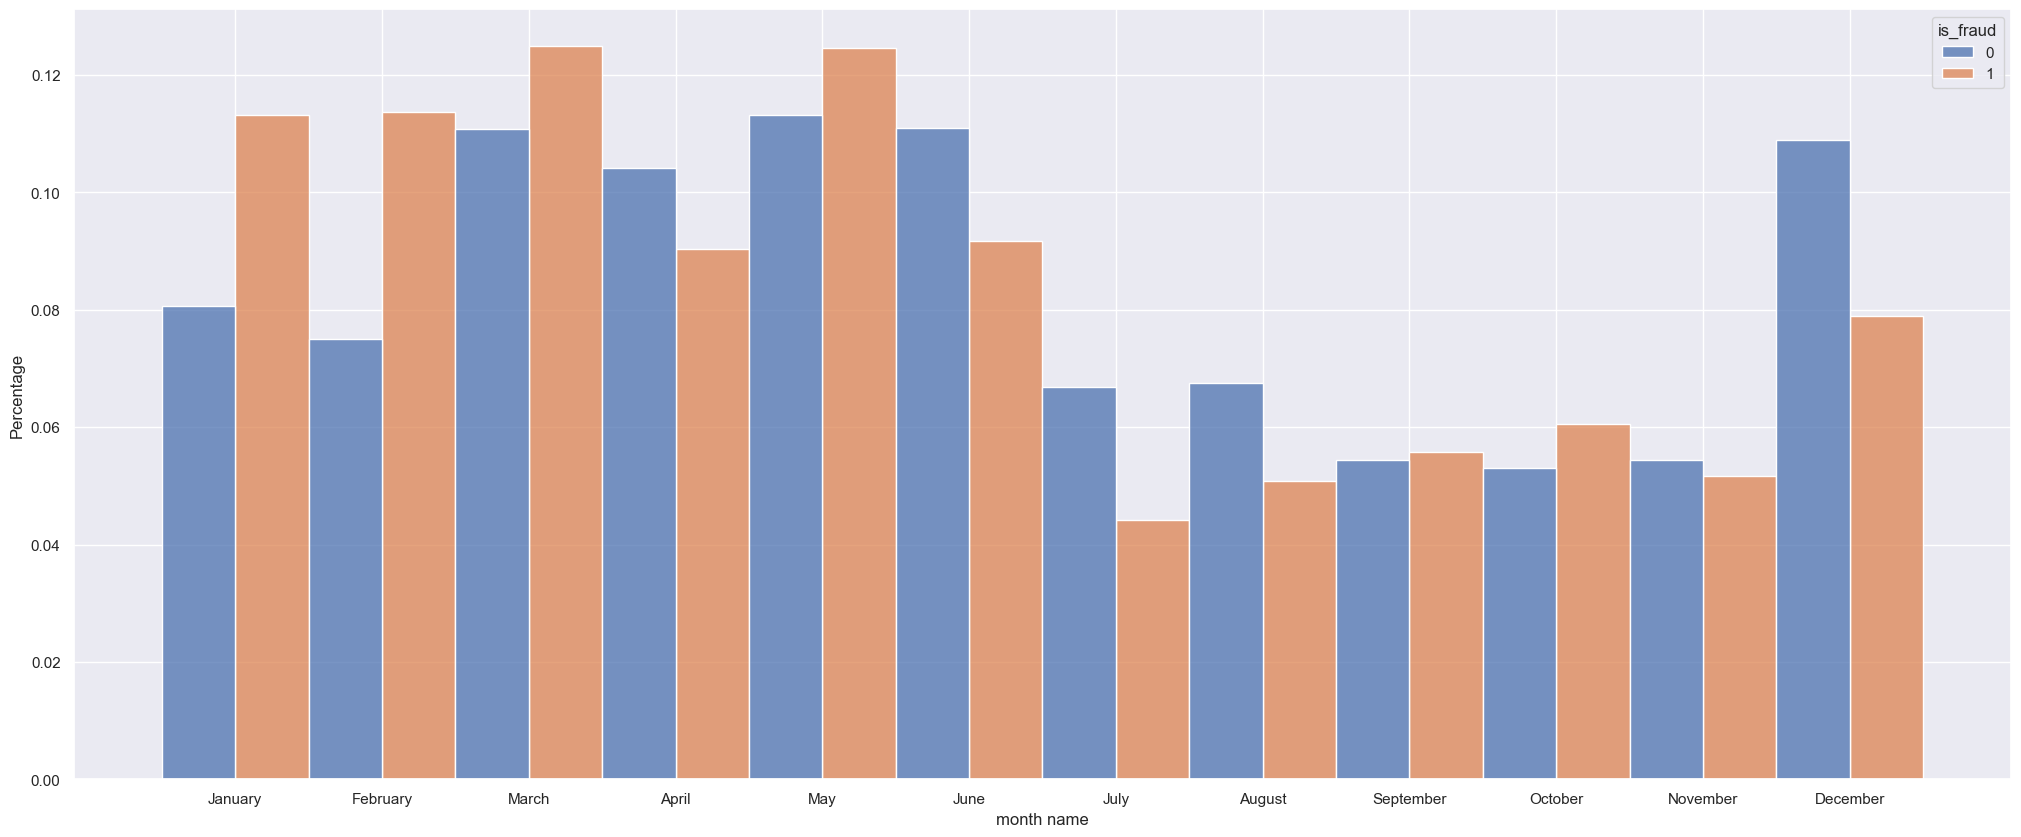

In [41]:
ax=sns.histplot(data=df, x="month_name", hue="is_fraud", common_norm=False,stat='probability',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('month name')
plt.show()

**Very interesting results! While normal payments peak around December (Christmas), and then late spring to early summer, fraudulent transactions are more concentrated in Jan-May. There is a clear seasonal trend.**

### Yearly trend :

In [42]:
df_trend = df["is_fraud"]

In [43]:
perc_fraud = df_trend.mean()*100

In [44]:
print(f'Fraud percentage is {perc_fraud:.2f} %') 

Fraud percentage is 0.58 %


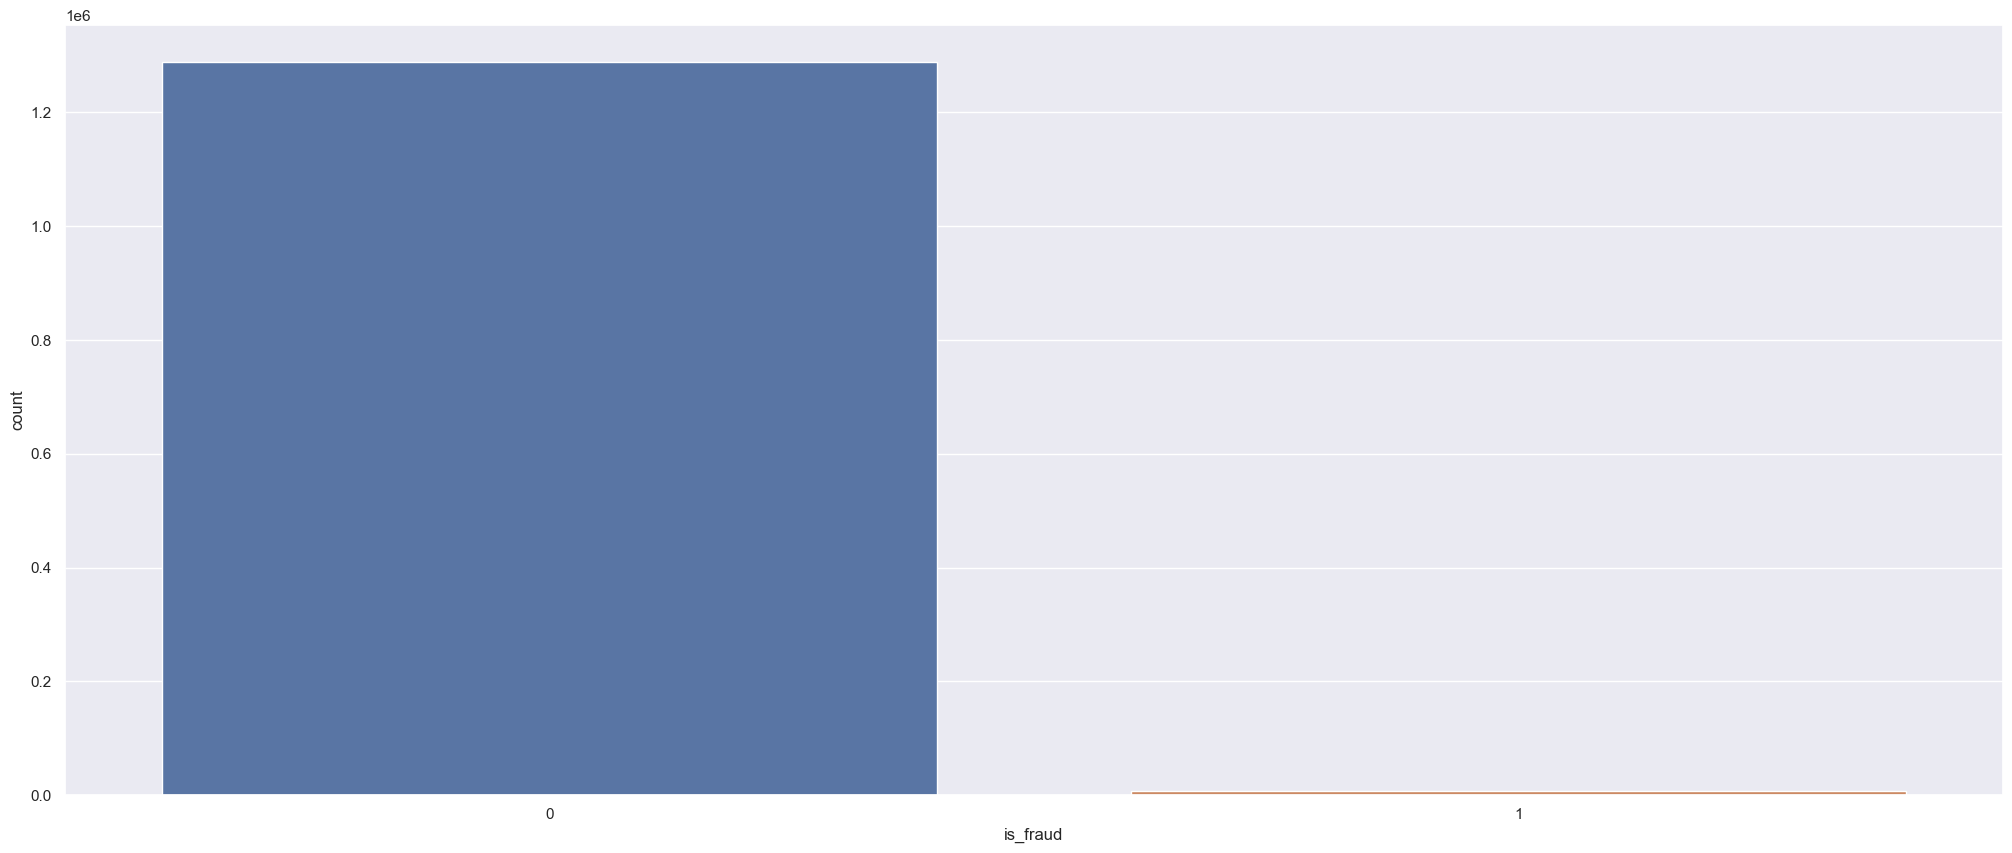

In [45]:
ax = sns.countplot(x="is_fraud", data=df_trend.to_frame())